In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

In [4]:
data = pd.read_csv('Music_Features_dataset(2).csv')

In [3]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [4]:
# music_genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [5]:
data[data['label']=='jazz'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
500,jazz.00000.wav,0.344568,0.046768,1504.404759,1754.409592,2800.374733,0.078464,-251.967318,137.889999,-11.156484,...,-3.148508,-1.848463,-1.002679,-2.589935,-1.962403,-1.502332,0.221480,-1.991628,-3.348312,jazz
501,jazz.00001.wav,0.328119,0.022799,1266.405832,1691.422950,2410.418758,0.059278,-345.733189,146.985042,-0.507857,...,1.222566,-1.942653,-5.551130,-4.402624,-2.604506,-5.194559,-5.416318,-3.122155,-0.792372,jazz
502,jazz.00002.wav,0.267640,0.080840,1064.810564,1050.419172,1896.030202,0.057873,-256.988341,175.320329,-44.813535,...,-7.605030,-7.650579,-11.742024,-8.173052,-7.497922,-12.295748,-6.769272,-3.495534,-8.644751,jazz
503,jazz.00003.wav,0.319313,0.059496,813.293729,1058.898921,1417.008098,0.044674,-297.215109,193.096518,10.161530,...,0.378860,-4.962201,3.240837,-4.476338,-1.891066,-2.272844,3.883316,0.344252,-2.214156,jazz
504,jazz.00004.wav,0.171782,0.108786,1039.623420,1422.303098,1838.213885,0.047769,-270.264822,137.571726,5.658533,...,-5.186267,-6.990923,-3.236812,-2.007815,4.412518,1.991310,4.985073,6.582728,-2.426803,jazz
505,jazz.00005.wav,0.248236,0.107555,1268.061497,1546.300122,2486.201633,0.057861,-246.291809,120.192479,-0.926510,...,4.230028,-0.278738,7.448169,0.722172,7.078672,0.863596,0.953356,1.736951,-1.345491,jazz
506,jazz.00006.wav,0.274875,0.098626,1219.805019,1459.237499,2416.718720,0.048062,-234.333408,142.727402,-14.275290,...,4.929632,-3.932907,2.184353,-6.675677,-9.760016,-4.469237,-5.536518,-1.166440,-1.104817,jazz
507,jazz.00007.wav,0.197231,0.093770,1169.864720,1355.424233,1958.038160,0.064834,-291.983276,137.721313,2.662652,...,10.400040,8.315607,5.229090,0.323189,0.378700,-1.479479,-0.755190,-6.327673,-5.542216,jazz
508,jazz.00008.wav,0.357398,0.118614,1304.575756,1636.561792,2723.916862,0.046275,-189.889800,134.417420,-25.671047,...,-1.141196,-5.041017,2.413433,-5.010100,-2.155745,-4.240500,1.840860,-0.440288,-4.768059,jazz
509,jazz.00009.wav,0.267063,0.085393,749.262845,1210.826651,1133.368147,0.031690,-296.671521,172.387283,16.886985,...,-0.110095,-7.951209,-3.195555,-8.075703,-4.059670,-0.835380,-3.870214,-2.819138,-6.923446,jazz


In [6]:
data[data['label']=='metal'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
599,metal.00000.wav,0.487800,0.116142,3274.342157,2722.316367,6407.227923,0.183080,-52.901488,50.085775,-11.487131,...,9.771427,-3.117403,3.659403,-6.507284,1.087841,-4.485401,4.725541,-2.755032,0.505966,metal
600,metal.00001.wav,0.476897,0.097317,2922.838550,2620.808960,6036.880162,0.152902,-80.118750,64.845207,-15.465500,...,11.442523,-10.365328,11.728632,-7.096006,5.930956,-9.025595,5.507720,-6.199701,3.126797,metal
601,metal.00002.wav,0.432488,0.132800,2198.534549,2005.997790,4446.439780,0.128393,-62.183622,115.187412,-42.804538,...,9.662311,-14.543764,6.927252,-7.479272,5.968114,-3.471041,6.574543,-6.574576,2.961322,metal
602,metal.00003.wav,0.487132,0.150219,2751.908964,2205.673206,5234.418348,0.166710,-43.033790,75.391379,-47.836386,...,15.969377,-13.137336,12.259780,-10.445485,5.937640,-6.679900,5.277037,-2.329495,3.591018,metal
603,metal.00004.wav,0.634762,0.063475,3403.101905,2825.133742,6902.891592,0.192424,-107.103639,47.655542,-8.620057,...,11.062812,-2.530152,7.580201,-4.197063,7.077187,-6.621545,4.543788,-4.262345,4.291028,metal
604,metal.00005.wav,0.422520,0.121786,2464.470948,2204.255360,4951.478392,0.134378,-79.624877,93.478351,-27.764328,...,8.954433,-16.092286,4.291080,-14.807442,0.271845,-8.219497,3.418718,-3.724500,-2.438343,metal
605,metal.00006.wav,0.433960,0.050464,3237.533909,2573.139782,6229.245666,0.198125,-140.757221,55.921455,-12.295087,...,9.075996,-8.798242,8.750060,-12.117431,5.550459,-12.494839,6.354935,-3.860836,4.729476,metal
606,metal.00007.wav,0.581357,0.069500,2939.523998,2522.778213,5806.856553,0.168373,-108.066968,65.770554,-20.833780,...,12.043259,-9.148092,7.006191,-8.747401,5.782763,-12.363865,3.441504,-7.371762,4.869835,metal
607,metal.00008.wav,0.466588,0.058412,2964.606631,2758.403837,6187.337586,0.140559,-149.959316,67.904218,-6.691160,...,7.716768,-1.157727,-3.302580,-7.533125,0.418287,-4.004879,1.262341,1.479780,5.482964,metal
608,metal.00009.wav,0.527123,0.312847,2250.756104,2390.069594,5112.344086,0.094679,3.666749,104.757604,-0.828039,...,15.670371,-12.993231,15.288284,-6.931292,9.864684,-6.504298,4.903823,-0.781283,6.459007,metal


In [7]:
data[data['label']=='classical'][0:10]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
100,classical.00000.wav,0.252391,0.036255,1505.299012,1558.952849,2717.008571,0.098245,-268.155963,135.689581,-34.070633,...,8.261256,-1.352934,-0.382257,1.031764,3.807187,-0.303797,1.778557,0.890328,-0.837884,classical
101,classical.00001.wav,0.215064,0.030628,1360.408354,1441.143831,2387.218898,0.087772,-324.058769,133.610044,-25.031100,...,3.522400,5.041735,1.361834,3.003346,-3.124863,-4.291534,0.591218,2.871973,0.366271,classical
102,classical.00002.wav,0.277865,0.043869,1490.034810,1599.959102,2784.916493,0.090050,-235.255816,141.128195,-34.666853,...,8.909783,-1.433871,4.281025,1.482141,3.187973,-1.309518,2.929818,-1.661003,-2.896666,classical
103,classical.00003.wav,0.234236,0.029450,1526.647067,1499.532617,2915.974034,0.108952,-326.864836,127.391310,-30.596096,...,2.807639,7.252176,3.980639,-2.389035,1.490968,0.583444,-0.610587,2.334469,2.649742,classical
104,classical.00004.wav,0.223171,0.042300,1705.704611,1646.292971,3175.739130,0.112867,-259.909976,118.939289,-35.611851,...,-1.196833,-6.347265,2.761452,-2.592574,4.384807,-4.136895,-4.779474,-4.772360,-4.608322,classical
105,classical.00005.wav,0.268582,0.043272,1431.427561,1558.388149,2836.657847,0.075239,-264.247349,138.148906,-30.094565,...,2.667866,-4.791535,-1.404992,-2.094342,2.984208,3.361478,4.814610,1.761762,-1.826767,classical
106,classical.00006.wav,0.261489,0.033232,1372.825807,1579.309887,2737.933444,0.072923,-295.702888,134.535094,-22.447184,...,4.062370,1.628092,5.138570,5.442816,2.285078,-1.816668,-2.923230,0.135035,3.197436,classical
107,classical.00007.wav,0.276529,0.040874,1358.918358,1516.208523,2667.900534,0.073147,-286.838421,135.919445,-24.437116,...,1.543668,-4.346957,-3.018977,-0.005314,5.652413,3.437010,2.830977,1.097174,-0.294304,classical
108,classical.00008.wav,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,127.769046,-29.901041,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,classical
109,classical.00009.wav,0.270478,0.023798,1216.293762,1582.801551,2560.259518,0.056270,-356.142201,139.805790,-6.278477,...,3.424293,-1.438334,-0.419473,-1.726719,-0.283631,-0.653538,1.160548,-0.624841,-0.257532,classical


In [8]:
data[data['label']=='pop'][0:10]

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
699,pop.00000.wav,0.389655,0.185919,3421.991610,3409.820295,7953.285241,0.126767,-94.529477,55.650465,29.270589,...,2.217485,-4.618740,-0.988773,-1.492683,3.131898,2.524273,4.109381,9.176212,4.733111,pop
700,pop.00001.wav,0.412941,0.262414,3702.987869,3431.805841,8073.092850,0.149476,-59.197684,45.251973,36.837734,...,1.909457,-0.920844,0.032961,0.087093,-0.832902,5.581455,3.830308,5.577998,4.921804,pop
701,pop.00002.wav,0.417830,0.215215,3213.614161,3269.675270,7424.096774,0.118869,-59.593671,62.980972,31.137546,...,4.252083,4.122022,5.728730,5.064749,5.669534,1.414350,2.817746,-1.401513,-3.374992,pop
702,pop.00003.wav,0.409987,0.129401,1837.123244,2066.889874,3670.894469,0.085352,-125.889050,126.625202,-23.190813,...,3.883525,-7.945909,2.053949,-2.337939,-1.483331,4.753721,-3.514642,4.894724,-3.201470,pop
703,pop.00004.wav,0.384338,0.211234,2753.175473,2861.394250,5986.147136,0.123763,-20.881365,83.238778,5.044182,...,-0.637433,-3.172675,1.544838,-0.921805,-2.961459,-1.329166,-0.867002,0.697110,-1.764898,pop
704,pop.00005.wav,0.323285,0.139581,2289.822524,2435.758719,4746.421299,0.106781,-113.616520,90.029568,-5.535827,...,-3.441161,-5.912328,-4.343138,-4.946289,-4.376622,-3.313489,-5.441470,-0.570559,-2.177704,pop
705,pop.00006.wav,0.374629,0.093983,2125.267705,2673.801946,4978.811560,0.067695,-169.122221,94.648315,24.508248,...,1.254533,-4.152501,-3.128182,0.295032,-3.551594,-2.806368,-5.756841,-5.214618,-0.096053,pop
706,pop.00007.wav,0.251577,0.084314,1968.420512,2326.835760,4127.150044,0.082345,-224.429648,107.307478,-1.567652,...,2.071808,6.198722,8.333522,7.580192,2.068624,4.557361,1.222659,-1.639573,-3.712766,pop
707,pop.00008.wav,0.403854,0.195515,2885.067672,3009.821451,6430.411116,0.121304,-52.502009,74.029915,12.758996,...,-1.207786,-2.691103,0.261203,-1.059644,-0.842508,-1.249282,-2.323700,3.809958,0.306752,pop
708,pop.00009.wav,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,61.242109,14.066686,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,pop


In [9]:
data[data['label']=='blues'][0:10]


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,spectral_rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,0.130225,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,0.095918,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,0.175573,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.141191,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,0.091563,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues
5,blues.00005.wav,0.302346,0.103468,1831.942368,1729.483241,3480.937285,0.094040,-177.869048,118.196916,-17.550673,...,-2.420615,-9.339365,-9.939325,-3.909892,-5.570625,-1.839023,-2.778421,-3.046866,-8.115809,blues
6,blues.00006.wav,0.291308,0.141796,1459.078483,1388.913312,2795.616429,0.073028,-190.149470,130.296951,-36.344138,...,-3.125678,-6.593118,-9.942268,-6.537224,-10.064755,-10.912171,-6.972479,-3.449033,-6.495511,blues
7,blues.00007.wav,0.307921,0.131785,1451.754147,1577.369917,2955.348796,0.061435,-179.395447,136.459244,-26.656359,...,-6.954827,-3.544535,-8.051242,-8.959537,-8.424337,-10.558885,-10.788159,-4.693749,-8.638613,blues
8,blues.00008.wav,0.409037,0.142438,1719.213163,2031.643884,3781.318802,0.064028,-121.361024,122.513116,-14.742130,...,7.010945,-12.741833,5.066005,-5.175478,-1.444025,-7.037070,2.697451,3.409809,-2.698353,blues
9,blues.00009.wav,0.274009,0.081352,1817.516386,1973.739070,3944.451148,0.079215,-213.180803,115.152794,-11.716264,...,3.784770,0.225669,-5.113638,-0.413063,-1.184538,-1.920714,-2.293728,2.891266,-4.233204,blues


In [5]:
dataset = data[data['label'].isin(['jazz', 'metal','classical','blues','pop'])].drop(['filename'],axis=1)
dataset.shape

(499, 27)

In [11]:
# K Neighbors Classification

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [13]:
y = LabelEncoder().fit_transform(dataset.iloc[:,-1])
print(y)
y.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

(499,)

In [14]:
X = StandardScaler().fit_transform(np.array(dataset.iloc[:, :-1], dtype = float))
print(X)
X.shape

[[-0.06332597  0.08679814 -0.40146293 ... -0.18676012 -0.08785079
   0.49614586]
 [-0.15955703 -0.36952354 -0.71455655 ... -0.00665081  0.40220714
   0.33301084]
 [ 0.08337902  0.6899969  -0.68670528 ... -0.54649573 -0.36376132
  -0.32070793]
 ...
 [ 1.19330179  1.07164883  1.72073491 ...  0.97502333  0.89847133
   2.15890495]
 [ 0.47315947  1.18893671  1.87324727 ... -0.76951988  0.16301152
  -0.38196456]
 [ 0.04964822  0.19281281  0.8053913  ...  1.41483235  0.86405192
   2.00349742]]


(499, 26)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (399, 26) (399,)
Test set: (100, 26) (100,)


In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
pred = knn.predict(X_test)
pred

array([4, 0, 2, 1, 2, 4, 1, 0, 3, 1, 2, 2, 3, 1, 1, 4, 4, 0, 1, 4, 2, 2,
       4, 0, 0, 0, 3, 4, 3, 0, 4, 3, 1, 0, 0, 3, 0, 1, 4, 2, 1, 4, 0, 3,
       2, 0, 3, 1, 3, 3, 2, 4, 3, 1, 0, 3, 4, 4, 4, 2, 4, 0, 4, 1, 2, 1,
       3, 0, 4, 2, 4, 1, 0, 0, 4, 2, 2, 3, 0, 4, 3, 4, 1, 4, 3, 1, 3, 4,
       1, 2, 3, 0, 3, 4, 0, 2, 3, 0, 0, 3])

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.88      0.94      0.91        16
           2       0.88      0.88      0.88        16
           3       0.71      0.88      0.79        17
           4       1.00      1.00      1.00        24

   micro avg       0.87      0.87      0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100



In [20]:
# KMeans Clustering

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

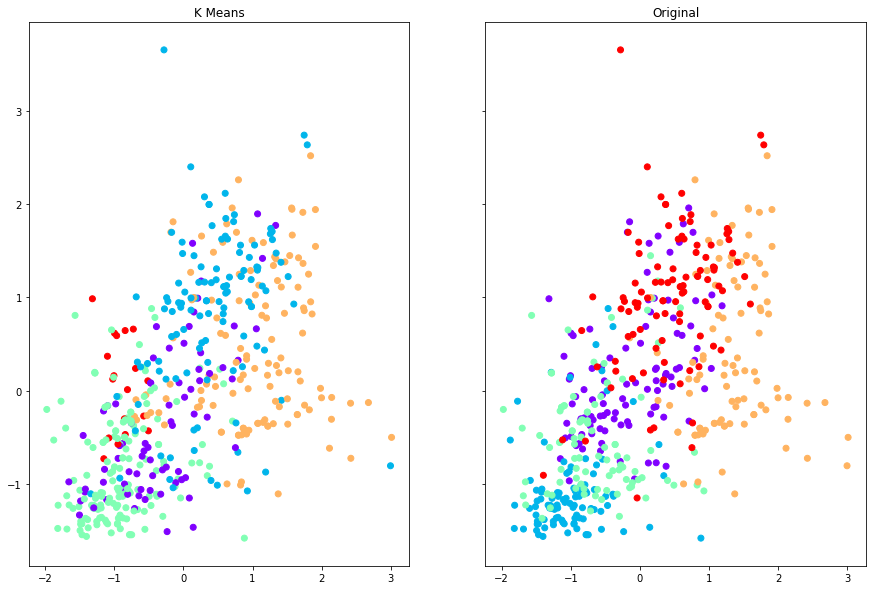

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
ax1.set_title('K Means')
ax1.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')

In [23]:
#Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='lbfgs', verbose=0 ,multi_class='auto').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = LR.predict(X_test)
y_pred

array([4, 3, 2, 1, 2, 4, 1, 3, 3, 2, 1, 2, 3, 1, 1, 4, 4, 0, 1, 4, 2, 2,
       4, 3, 3, 1, 3, 4, 3, 3, 4, 3, 1, 0, 3, 3, 0, 1, 4, 4, 1, 4, 0, 3,
       0, 2, 3, 1, 3, 3, 1, 4, 3, 1, 2, 3, 4, 4, 4, 2, 4, 0, 4, 1, 2, 1,
       3, 0, 4, 2, 4, 1, 0, 0, 4, 1, 1, 3, 3, 4, 3, 4, 1, 4, 3, 1, 3, 4,
       1, 2, 3, 0, 3, 4, 2, 0, 3, 2, 3, 3])

In [26]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.33      0.47        27
           1       0.76      1.00      0.86        16
           2       0.64      0.56      0.60        16
           3       0.59      1.00      0.74        17
           4       0.96      1.00      0.98        24

   micro avg       0.75      0.75      0.75       100
   macro avg       0.75      0.78      0.73       100
weighted avg       0.78      0.75      0.72       100



In [27]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_pred)

0.75

In [28]:
#Support Vector Machines

In [29]:
from sklearn import svm

In [30]:
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=1).fit(X_train, y_train)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [32]:
print("Poly_pred:")
print (classification_report(y_test, poly_pred))

Poly_pred:
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        27
           1       0.89      1.00      0.94        16
           2       0.75      0.94      0.83        16
           3       0.71      0.88      0.79        17
           4       1.00      0.96      0.98        24

   micro avg       0.85      0.85      0.85       100
   macro avg       0.85      0.87      0.85       100
weighted avg       0.86      0.85      0.85       100



In [33]:
print("Rbf_pred:")
print (classification_report(y_test, rbf_pred))

Rbf_pred:
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.94      1.00      0.97        16
           2       0.82      0.88      0.85        16
           3       0.75      0.88      0.81        17
           4       1.00      1.00      1.00        24

   micro avg       0.88      0.88      0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.88      0.88      0.88       100



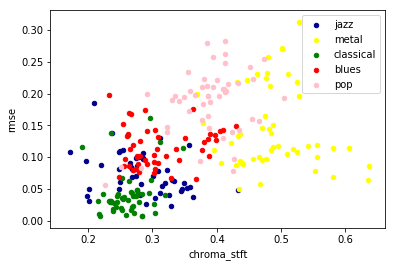

In [34]:
ax = dataset[dataset['label'] == 'jazz'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='DarkBlue', label='jazz');
dataset[dataset['label'] == 'metal'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Yellow', label='metal', ax=ax);
dataset[dataset['label'] == 'classical'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Green', label='classical', ax=ax);
dataset[dataset['label'] == 'blues'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Red', label='blues', ax=ax);
dataset[dataset['label'] == 'pop'][0:50].plot(kind='scatter', x='chroma_stft', y='rmse', color='Pink', label='pop', ax=ax);
plt.show()

In [35]:
#Decsission Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [37]:
musicTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
musicTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
musicTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
predTree = musicTree.predict(X_test)

In [40]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.82


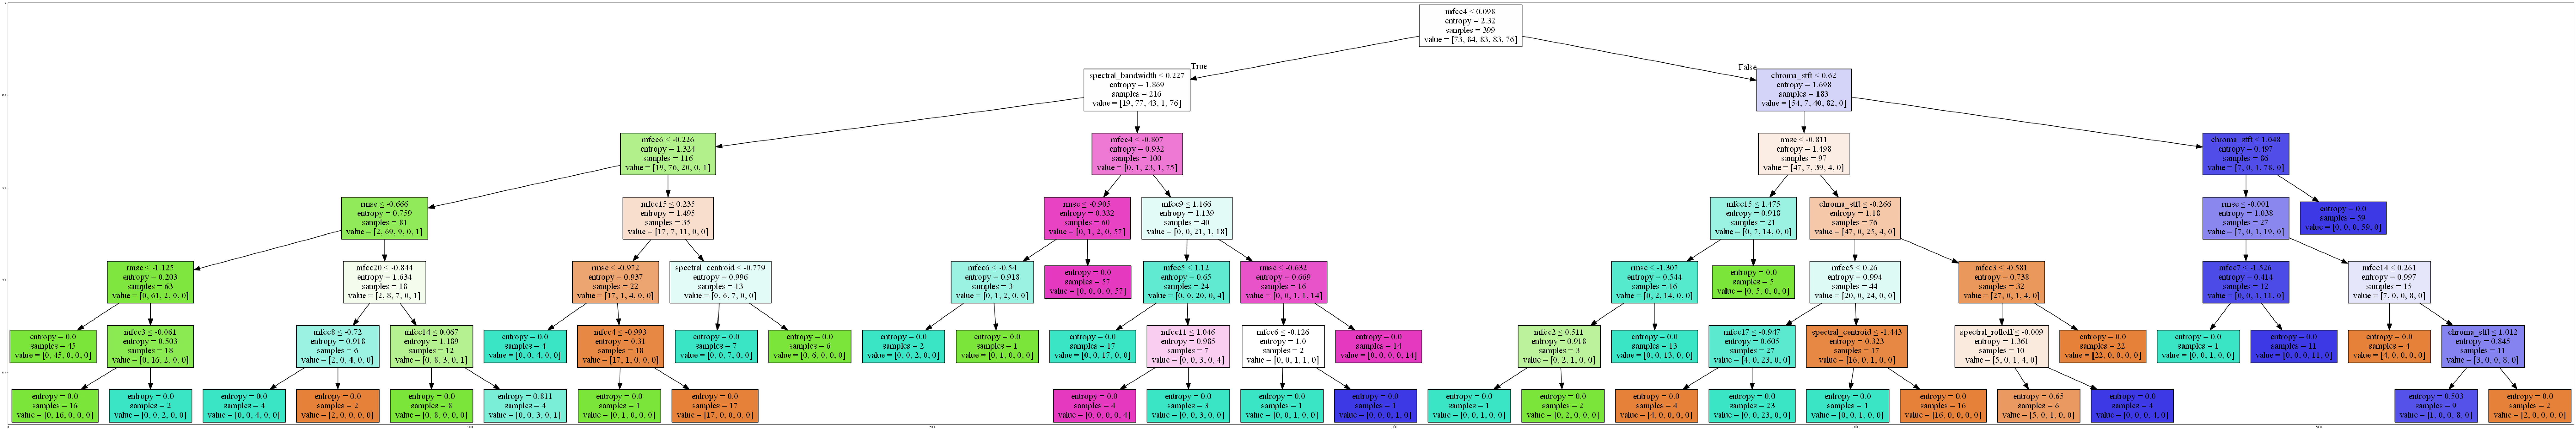

In [41]:
dot_data = StringIO()
filename = "musictree2.png"
featureNames = dataset.columns[0:26]
targetNames = dataset["label"].unique().tolist()
out=tree.export_graphviz(musicTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(200, 400))
plt.imshow(img,interpolation='nearest')